### **In this part we performs basic Exploratory Data Analysis (EDA) on the chosen dataset. It includes data loading, cleaning, visualization, and summary statistics to understand the underlying patterns and relationships within the data.**
---

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

PATH_TO_DATA = "../csv_exports/"

Initialize dataframe on main dataset. Using flag `low_memory = False` not to limit memory usage.


### Step 1: Load the dataset

Lets add item dataset as df_items.

In [110]:
df_items = pd.read_csv(PATH_TO_DATA + "item_full_export.csv", low_memory=False)
df_items

,market_hash_name,classid,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,price,id,real_instance,old_price,base_id,phase,paintindex,type,avg_price
0,Sticker | fnx | Cologne 2016,1835681296,188530139,0,2024-10-24 23:42:49,NaN,NaN,NaN,0.0,52116.0,88473924,188530139,0.0,0,NaN,NaN,Sticker,4.25
1,Sticker | Keoz (Gold) | Copenhagen 2024,6142409366,188530139,39392224748,2024-10-24 23:36:49,NaN,NaN,NaN,75.0,5610.0,5705064202,188530139,0.0,102737,NaN,NaN,Sticker,3.38
2,Sticker | Keoz (Gold) | Copenhagen 2024,6142409366,188530139,39392224741,2024-10-24 23:36:49,NaN,NaN,NaN,75.0,5610.0,5705064690,188530139,0.0,102737,NaN,NaN,Sticker,3.38
3,Sticker | Keoz (Gold) | Copenhagen 2024,6142409366,188530139,39392224735,2024-10-24 23:36:49,NaN,NaN,NaN,75.0,5610.0,5705064746,188530139,0.0,102737,NaN,NaN,Sticker,3.38
4,Sealed Graffiti | Smarmy (War Pig Pink),3608084332,519977179,18045451491,2024-10-24 23:02:29,0.0,NaN,NaN,50.0,720.0,670444127,519977179,0.0,81278,NaN,0.0,Graffiti,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701615,AWP | Neo-Noir (Minimal Wear),6221039356,5840723944,40003498872,2024-10-25 00:20:02,NaN,NaN,32006078374|31887059003|32006078374,95.0,27981.0,5843604927,5840723944,0.0,76546,NaN,NaN,Sniper Rifle,33.50
701616,Dual Berettas | Royal Consorts (Well-Worn),6222015788,480085569,40030174124,2024-10-25 00:20:03,NaN,NaN,NaN,100.0,430.0,5843604935,480085569,0.0,2835,NaN,NaN,Pistol,0.41
701617,Desert Eagle | Code Red (Battle-Scarred),6221039350,188530139,40004199066,2024-10-25 00:20:03,NaN,NaN,9074754424,95.0,16589.0,5843604943,188530139,0.0,4506,NaN,NaN,Pistol,17.68
701618,Chroma 2 Case,926978479,0,39910167364,2024-10-25 00:20:03,NaN,NaN,NaN,75.0,2771.0,5843604951,0,0.0,920,NaN,NaN,Container,3.03


The price in the dataset is in (dollar+cents)*1000. Lets "standartize" it to just dollar+cents

In [111]:
df_items['price'] = df_items["price"]/1000


### Step 2: Gather basic info on the dataset

In [112]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701620 entries, 0 to 701619
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   market_hash_name    701620 non-null  object 
 1   classid             701620 non-null  int64  
 2   instanceid          701620 non-null  int64  
 3   asset               701620 non-null  int64  
 4   stamp               701620 non-null  object 
 5   float               323032 non-null  float64
 6   paintseed           317278 non-null  float64
 7   stickers            105012 non-null  object 
 8   chance_to_transfer  701620 non-null  float64
 9   price               701620 non-null  float64
 10  id                  701620 non-null  int64  
 11  real_instance       701620 non-null  int64  
 12  old_price           701620 non-null  float64
 13  base_id             701620 non-null  int64  
 14  phase               1135 non-null    object 
 15  paintindex          318723 non-nul

The initial dimensionality of the created dataframe is 701620 rows x 18 columns.



### Step 3: Check for duplicates

The data gathered was loaded from the db with id as a pk with a unique constraint so no duplitates are possibe. Nevertheless, lets check the uniqueness of each field.


In [113]:
df_items.nunique()

market_hash_name       19401
classid               209249
instanceid              9553
asset                 625381
stamp                   9198
float                 318305
paintseed               1000
stickers               54920
chance_to_transfer       102
price                  37632
id                    701620
real_instance           9550
old_price              47143
base_id                 9012
phase                      8
paintindex              1164
type                      22
avg_price               6422
dtype: int64

### Step 4: Assessment of data gaps

In [114]:
# Определение столбцов с пропущенными значениями
missing_values = df_items.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(df_items)) * 100

# Создание DataFrame для удобного отображения
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
})

# Сортировка по количеству пропущенных значений
missing_data_df = missing_data_df.sort_values(by='Missing Values', ascending=False)

print(missing_data_df)

            Missing Values  Percentage
phase               700485   99.838232
stickers            596608   85.032924
paintseed           384342   54.779225
paintindex          382897   54.573273
float               378588   53.959123
type                  4071    0.580229


As we saw in the previous output, some items lack values for avg_price or float, marked as NaN or zeros. This data is not useful for us, so let's remove it.

### Step 5: Proccessing of data gaps

In [115]:
df_items.dropna(subset=["float", "avg_price"], inplace = True)
df_items = df_items[(df_items["float"] != 0) & (df_items["avg_price"] != 0)]
df_items

,market_hash_name,classid,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,price,id,real_instance,old_price,base_id,phase,paintindex,type,avg_price
6,StatTrak™ P250 | Muertos (Minimal Wear),3245227603,902658099,16210381346,2024-10-24 23:42:49,0.113143,NaN,1909039045|1909039045|1909039045,70.0,19.679,1013402736,902658099,177700.0,741,NaN,NaN,Pistol,17.35
11,Nova | Windblown (Battle-Scarred),4428769401,188530139,25049162004,2024-10-25 00:03:19,0.480939,NaN,NaN,90.0,0.511,2660532544,188530139,0.0,84521,NaN,NaN,Shotgun,0.17
12,Galil AR | Black Sand (Battle-Scarred),3733036366,188530139,21379516142,2024-10-24 21:02:27,0.951013,NaN,2220190233|2220190233|2220190233,70.0,0.208,2505888101,188530139,0.0,2827,NaN,NaN,Rifle,0.17
14,MAC-10 | Allure (Field-Tested),3951787039,480085569,25120031636,2024-10-24 23:02:29,0.308989,NaN,NaN,80.0,1.025,2690764124,480085569,0.0,81867,NaN,NaN,SMG,0.48
21,G3SG1 | Green Apple (Factory New),4955863397,0,26831752653,2024-10-24 23:56:31,0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,90.0,9.843,3475320686,0,0.0,447,NaN,NaN,Sniper Rifle,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701583,XM1014 | Black Tie (Well-Worn),5631809222,480085569,39962184633,2024-10-25 00:19:55,0.411214,157.0,18175348010|18194024765,80.0,0.358,5843604519,480085569,0.0,1774,NaN,557.0,Shotgun,0.45
701586,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),1856074576,188530170,39687576355,2024-10-25 00:20:00,0.148043,237.0,62186996,90.0,2.971,5843604567,188530170,0.0,353,NaN,289.0,Pistol,3.76
701588,AWP | Neo-Noir (Minimal Wear),6220230337,188530139,40005460696,2024-10-25 00:19:58,0.121607,893.0,NaN,95.0,27.981,5843604599,188530139,0.0,76546,NaN,803.0,Sniper Rifle,33.50
701589,M4A4 | Magnesium (Minimal Wear),6221983356,188530139,40031707614,2024-10-25 00:19:55,0.108802,668.0,NaN,100.0,0.540,5843604623,188530139,0.0,76519,NaN,811.0,Rifle,0.74


Nice! Now we have 320,677 rows × 18 columns. Lets move on with further cleanup!

### Step 6: Data Distribution Analysis

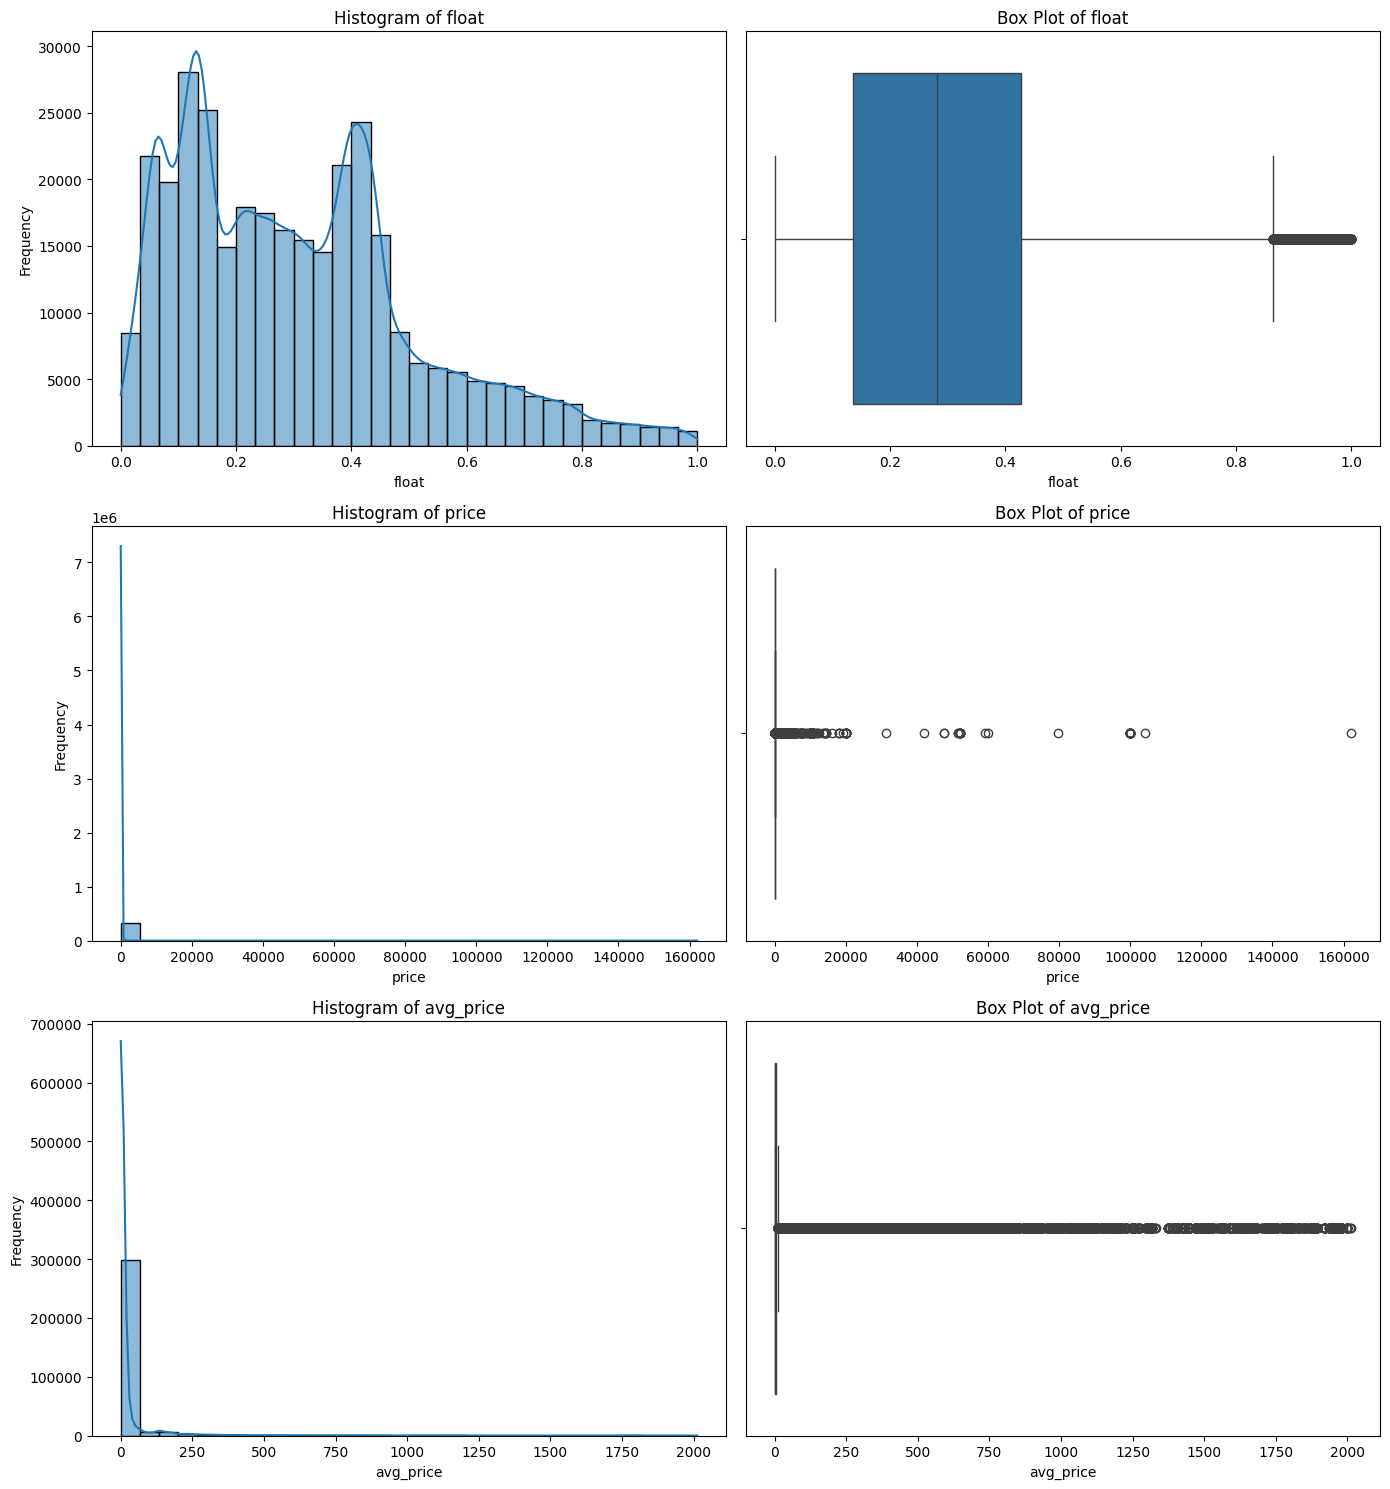

In [116]:
# List of numerical columns to analyze
numerical_columns = ['float', 'price', 'avg_price']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(14, 5 * len(numerical_columns)))
axes = axes.flatten()

# Iterate through each numerical column
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df_items[column], bins=30, kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of {column}')
    axes[2*i].set_xlabel(column)
    axes[2*i].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=df_items[column], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box Plot of {column}')
    axes[2*i + 1].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

### Step 7: Assessment of Catergorical features

In [117]:
# Изучение категориальных признаков — анализ частотного распределения категориальных данных
categorical_columns = ['type', 'market_hash_name']

for column in categorical_columns:
    print(f"Frequency distribution for {column}:")
    print(df_items[column].value_counts())
    print("\n")

Frequency distribution for type:
type
Pistol          108491
Rifle            83883
SMG              50327
Sniper Rifle     34820
Shotgun          21516
Knife            12259
Machinegun        6587
Gloves            2792
Sticker              2
Name: count, dtype: int64


Frequency distribution for market_hash_name:
market_hash_name
P250 | Cassette (Field-Tested)                           1777
AK-47 | Safari Mesh (Field-Tested)                       1519
AK-47 | Slate (Field-Tested)                             1303
Glock-18 | High Beam (Factory New)                        873
Five-SeveN | Coolant (Field-Tested)                       864
                                                         ... 
★ StatTrak™ Flip Knife | Black Laminate (Factory New)       1
★ Survival Knife | Scorched (Factory New)                   1
MAC-10 | Urban DDPAT (Well-Worn)                            1
Souvenir M4A1-S | Control Panel (Well-Worn)                 1
StatTrak™ AWP | Wildfire (Minimal Wear)      

### Step 8: Analysis of numerical features

In [118]:
# Расчет основных статистических показателей для числовых переменных
numerical_stats = df_items[numerical_columns].describe().T

# Добавление медианы
numerical_stats['median'] = df_items[numerical_columns].median()

# Добавление стандартного отклонения
numerical_stats['std'] = df_items[numerical_columns].std()

print(numerical_stats)

              count       mean          std       min       25%      50%  \
float      320677.0   0.310584     0.209571  0.000002  0.135261  0.28083   
price      320677.0  47.520621  1120.344598  0.007000  0.209000  1.11400   
avg_price  320677.0  27.762894   132.610471  0.030000  0.150000  0.92000   

                75%            max   median  
float      0.426953       0.999884  0.28083  
price      6.000000  162136.795000  1.11400  
avg_price  5.150000    2012.880000  0.92000  


### Step 9: Correlation analysis

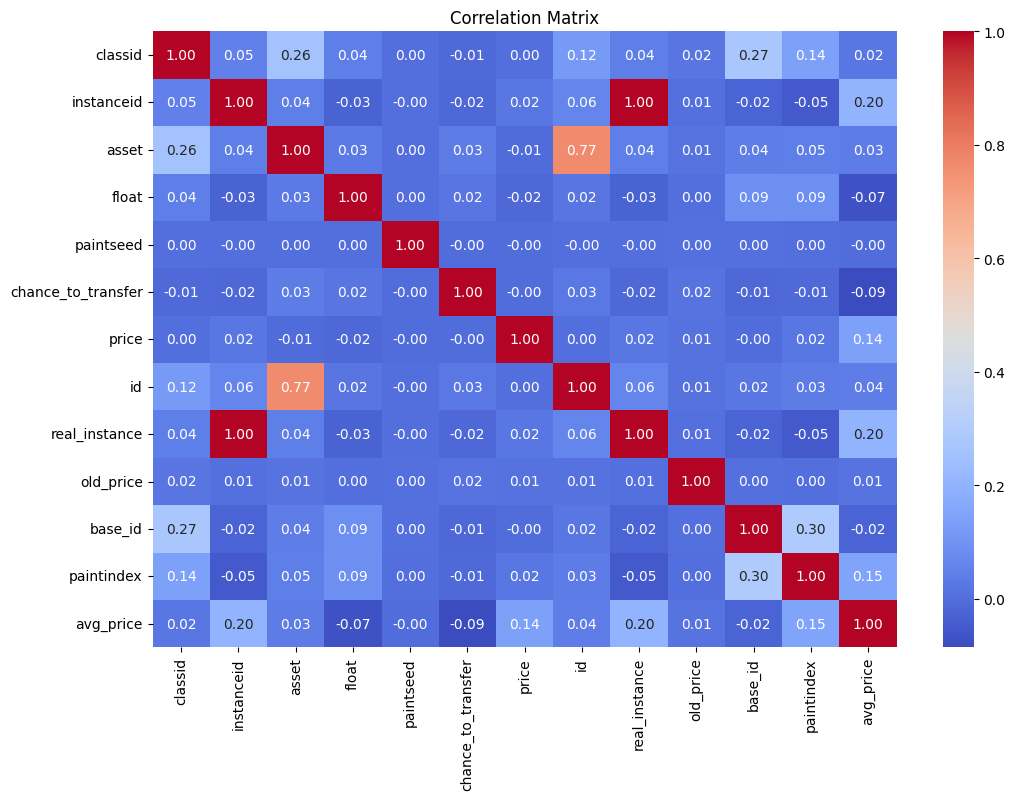

In [119]:
# Вычисление корреляционной матрицы, исключая нечисловые столбцы
numeric_df_items = df_items.select_dtypes(include=[float, int])
correlation_matrix = numeric_df_items.corr()

# Визуализация корреляционной матрицы с помощью heatmap из seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Step 10: Outliers Analysis

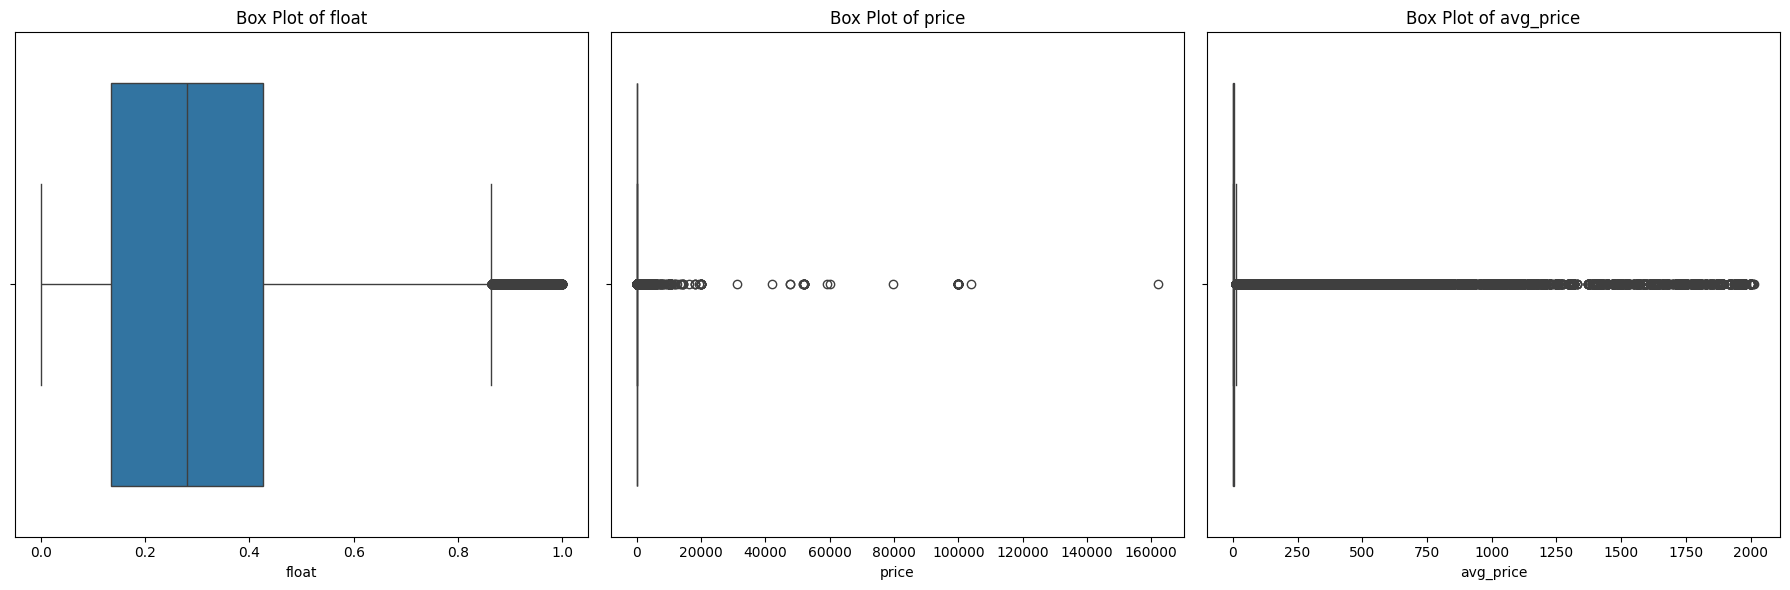

Количество выбросов в каждом столбце:
float         5637
price        51123
avg_price    51900
dtype: int64
Размер данных до удаления выбросов: (320677, 18)
Размер данных после удаления выбросов: (259882, 18)


In [120]:
# Визуализация выбросов с помощью boxplot для числовых столбцов
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(18, 6))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_items[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

# Расчет межквартильного размаха (IQR) для каждого числового столбца
Q1 = df_items[numerical_columns].quantile(0.25)
Q3 = df_items[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов
outliers = ((df_items[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_items[numerical_columns] > (Q3 + 1.5 * IQR)))

# Подсчет количества выбросов в каждом столбце
outliers_count = outliers.sum()
print("Количество выбросов в каждом столбце:")
print(outliers_count)

# Удаление выбросов
df_items_no_outliers = df_items[~((df_items[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_items[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Проверка размерности данных до и после удаления выбросов
print(f"Размер данных до удаления выбросов: {df_items.shape}")
print(f"Размер данных после удаления выбросов: {df_items_no_outliers.shape}")

### Step 11: Feature transformation

C:\Users\user\AppData\Local\Temp\ipykernel_6408\2099657845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['log_price'] = np.log1p(df_items['price'])
C:\Users\user\AppData\Local\Temp\ipykernel_6408\2099657845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['log_avg_price'] = np.log1p(df_items['avg_price'])


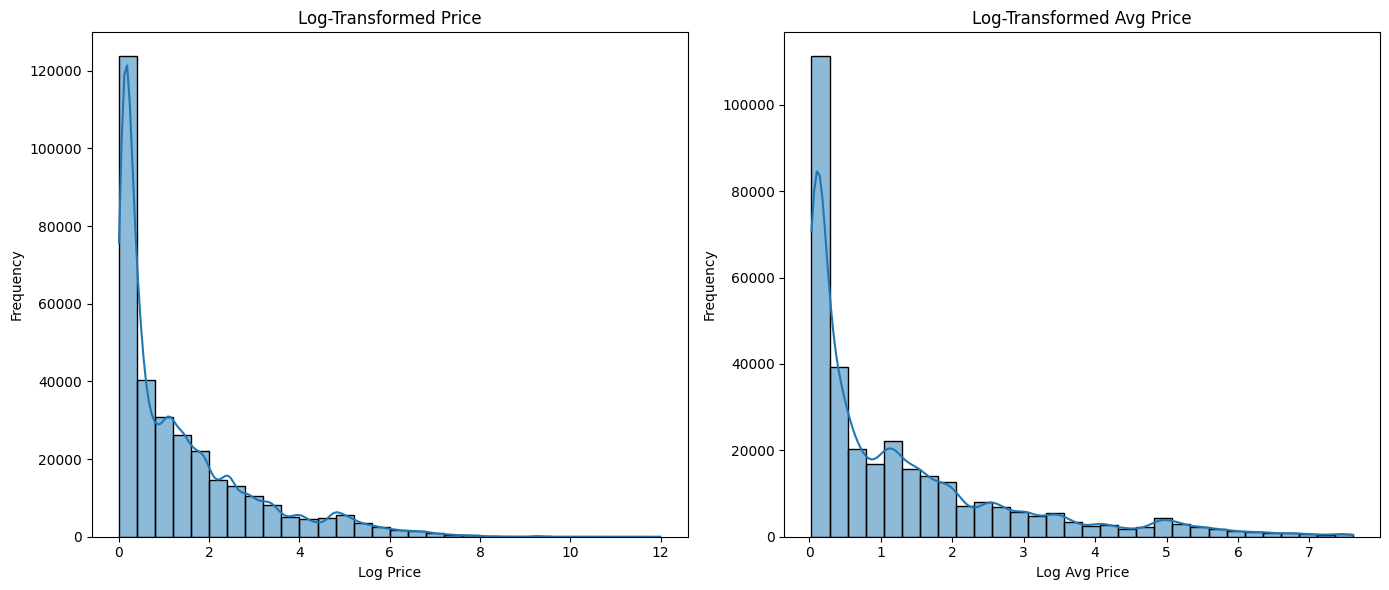

In [121]:
# Применение логарифмирования к признакам 'price' и 'avg_price'
df_items['log_price'] = np.log1p(df_items['price'])
df_items['log_avg_price'] = np.log1p(df_items['avg_price'])

# Проверка распределения после логарифмирования
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(df_items['log_price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Log-Transformed Price')
axes[0].set_xlabel('Log Price')
axes[0].set_ylabel('Frequency')

sns.histplot(df_items['log_avg_price'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Avg Price')
axes[1].set_xlabel('Log Avg Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---
As we saw in the previous analysis non of the encoding methods would benefit(OHE - would increase the dimensionality of the table drastically; Label Encoder - our categorical features are not represetned as heirarchy of any sort), so lets skip to another step.

### Step 12: Scaling of numeric features

To bring the features to the same scale, we will use robust standardisation. Robust standardisation involves transforming the data so that it is scaled according to the median and the interquartile range (IQR). This is particularly useful for features that have a large standard deviation and are prone to outliers, as in the case of `price` which has a `std of >899000`!

In [122]:
from sklearn.preprocessing import RobustScaler

# Инициализация стандартизатора
scaler = RobustScaler()

# Применение стандартизации к признаку 'price'
df_items['price_standardized'] = scaler.fit_transform(df_items[['price']])

# Проверка распределения после стандартизации
df_items[['price', 'price_standardized']].describe()


C:\Users\user\AppData\Local\Temp\ipykernel_6408\3150550033.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['price_standardized'] = scaler.fit_transform(df_items[['price']])


,price,price_standardized
count,320677.000000,320677.000000
mean,47.520621,8.013576
std,1120.344598,193.463063
min,0.007000,-0.191159
25%,0.209000,-0.156277
50%,1.114000,0.000000
75%,6.000000,0.843723
max,162136.795000,27997.872734


The `price` attribute is now standardised and brought to the same scale as other attributes.

### Step 13: Feature engineering

The feature sticker is a categorical feature(string) that cosists of sticker id's seperated by "`|`". We have a seperate dataset (*sticker.csv*) that conists of mapping of sticker_id to market_hash_name and its avg_price. We'll load it and try to create a new feature that would be called `sum_of_sticker_prices`. The name expains itself.

#### Firstly, lets load the dataset

Lets perform a brief analysis of the dataset.


In [123]:
df_stiickers = pd.read_csv(PATH_TO_DATA + "sticker.csv", low_memory=False)
df_stiickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3056 non-null   int64  
 1   market_hash_name  3056 non-null   object 
 2   avg_price         3056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.8+ KB


As we can see no data gaps are found. Thats because we verified integrity of the dataset beforehand in the db.

#### Secondly, we need to write a function to parse the sticker ids, create a new feauture and to map it with the corresponding values in the sticker dataset.

In [124]:
def get_avg_sticker_price(sticker_ids, df_stickers):
	if pd.isna(sticker_ids):
		return 0
	ids = sticker_ids.split('|')
	prices = df_stickers[df_stickers['id'].isin(map(int, ids))]['avg_price']
	return prices.sum() if not prices.empty else 0

df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)
df_items.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6408\665571864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)


,market_hash_name,classid,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,price,...,old_price,base_id,phase,paintindex,type,avg_price,log_price,log_avg_price,price_standardized,sum_sticker_price
6,StatTrak™ P250 | Muertos (Minimal Wear),3245227603,902658099,16210381346,2024-10-24 23:42:49,0.113143,NaN,1909039045|1909039045|1909039045,70.0,19.679,...,177700.0,741,NaN,NaN,Pistol,17.35,3.029119,2.909630,3.205837,0.00
11,Nova | Windblown (Battle-Scarred),4428769401,188530139,25049162004,2024-10-25 00:03:19,0.480939,NaN,NaN,90.0,0.511,...,0.0,84521,NaN,NaN,Shotgun,0.17,0.412772,0.157004,-0.104127,0.00
12,Galil AR | Black Sand (Battle-Scarred),3733036366,188530139,21379516142,2024-10-24 21:02:27,0.951013,NaN,2220190233|2220190233|2220190233,70.0,0.208,...,0.0,2827,NaN,NaN,Rifle,0.17,0.188966,0.157004,-0.156450,0.00
14,MAC-10 | Allure (Field-Tested),3951787039,480085569,25120031636,2024-10-24 23:02:29,0.308989,NaN,NaN,80.0,1.025,...,0.0,81867,NaN,NaN,SMG,0.48,0.705570,0.392042,-0.015369,0.00
21,G3SG1 | Green Apple (Factory New),4955863397,0,26831752653,2024-10-24 23:56:31,0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,90.0,9.843,...,0.0,447,NaN,NaN,Sniper Rifle,0.17,2.383520,0.157004,1.507339,5.67


It took a while because of the size of the datasets and lack of hash indexies. Nevertheless, we got our new feature called `sum_of_stickers`!

### Step 14: Removal of irrelevant features

The id is a unique value that is composite of classid, asset, instanceid, base_id and real_instance, so there is no need to keep them all afterall. We could reindex the df making the id field prime index later on.

In [125]:
columns_to_drop = ["classid", "instanceid", "base_id", "real_instance", "asset"]
df_items = df_items.drop(columns=[col for col in columns_to_drop if col in df_items.columns])
df_items.head(1)

,market_hash_name,stamp,float,paintseed,stickers,chance_to_transfer,price,id,old_price,phase,paintindex,type,avg_price,log_price,log_avg_price,price_standardized,sum_sticker_price
6,StatTrak™ P250 | Muertos (Minimal Wear),2024-10-24 23:42:49,0.113143,NaN,1909039045|1909039045|1909039045,70.0,19.679,1013402736,177700.0,NaN,NaN,Pistol,17.35,3.029119,2.90963,3.205837,0.0


Perfect! Now the dimensionality of the dataset is reduced to 13 columns.

Few columns hold no relevance to our goal and can be excluded. These include:

1. `stamp`: when item was listed, which is not matter to our analysis;
2. `old_price`: this field only displays the previous price set by the user before any adjustments;
3. `chance_to_transfer`: this field provides information about the user who listed the item.

In [126]:
useless_fields = ['old_price', 'stamp', 'chance_to_transfer']
df_items.drop(columns=[col for col in useless_fields if col in df_items.columns], inplace=True)
df_items.head(1)

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price,log_price,log_avg_price,price_standardized,sum_sticker_price
6,StatTrak™ P250 | Muertos (Minimal Wear),0.113143,NaN,1909039045|1909039045|1909039045,19.679,1013402736,NaN,NaN,Pistol,17.35,3.029119,2.90963,3.205837,0.0


Our goal is to see how **sticker prices** placed on item affect the **item's price**. The dataset is a listing that consists of all items avialable for purchase as of 24.10.2024.
Some items such as **`Sticker`(obvious one), `Knife`, `Gloves`, `Agent`** cant have stickers placed on them, so lets filter them out.


In [127]:
df_items['type'].value_counts()


type
Pistol          108491
Rifle            83883
SMG              50327
Sniper Rifle     34820
Shotgun          21516
Knife            12259
Machinegun        6587
Gloves            2792
Sticker              2
Name: count, dtype: int64

In [128]:
types_to_delete = ['Knife', 'Gloves', 'Agent', 'Sticker', 'Container', 'Graffiti', 'Music Kit',
                    'Patch', 'Tag', 'Key', 'Pass', 'Collectible', 'Charm', 'Equipment', 'Tool', 'Gift']
df_items.drop(df_items[df_items['type'].isin(types_to_delete)].index, inplace=True)
df_items['type'].value_counts()


type
Pistol          108491
Rifle            83883
SMG              50327
Sniper Rifle     34820
Shotgun          21516
Machinegun        6587
Name: count, dtype: int64

Awesome! Now we have a clean dataset with only the necessary columns. Let's move on to the next step: data analysis and visualization. We will create some plots to explore the relationships between different variables in the dataset.

### Step 15: Data visualization

#### Sampling bias

In [129]:
df_items.head(5)

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price,log_price,log_avg_price,price_standardized,sum_sticker_price
6,StatTrak™ P250 | Muertos (Minimal Wear),0.113143,NaN,1909039045|1909039045|1909039045,19.679,1013402736,NaN,NaN,Pistol,17.35,3.029119,2.909630,3.205837,0.00
11,Nova | Windblown (Battle-Scarred),0.480939,NaN,NaN,0.511,2660532544,NaN,NaN,Shotgun,0.17,0.412772,0.157004,-0.104127,0.00
12,Galil AR | Black Sand (Battle-Scarred),0.951013,NaN,2220190233|2220190233|2220190233,0.208,2505888101,NaN,NaN,Rifle,0.17,0.188966,0.157004,-0.156450,0.00
14,MAC-10 | Allure (Field-Tested),0.308989,NaN,NaN,1.025,2690764124,NaN,NaN,SMG,0.48,0.705570,0.392042,-0.015369,0.00
21,G3SG1 | Green Apple (Factory New),0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,9.843,3475320686,NaN,NaN,Sniper Rifle,0.17,2.383520,0.157004,1.507339,5.67


Sort the dataframe to show items with the top 12 most popular market_hash_name

In [130]:
top_12_popular_names = df_items['market_hash_name'].value_counts().head(12).index
top_12_popular_names_count = df_items['market_hash_name'].value_counts().head(12)
print(top_12_popular_names_count.to_frame().reset_index().rename(columns={'index': 'market_hash_name', 'market_hash_name': 'count'}))

                                             count  count
0                   P250 | Cassette (Field-Tested)   1777
1               AK-47 | Safari Mesh (Field-Tested)   1519
2                     AK-47 | Slate (Field-Tested)   1303
3               Glock-18 | High Beam (Factory New)    873
4              Five-SeveN | Coolant (Field-Tested)    864
5                       SSG 08 | Abyss (Well-Worn)    739
6                Tec-9 | Red Quartz (Field-Tested)    709
7                     AWP | Atheris (Field-Tested)    665
8               AK-47 | Safari Mesh (Minimal Wear)    634
9   Desert Eagle | Mecha Industries (Field-Tested)    629
10         StatTrak™ SG 553 | Aloha (Field-Tested)    624
11                SSG 08 | Acid Fade (Factory New)    601


Here are boxplots for the 12 most popular items to examine price dependency on stickers. This analysis will also help in identifying any anomalies within the dataset.

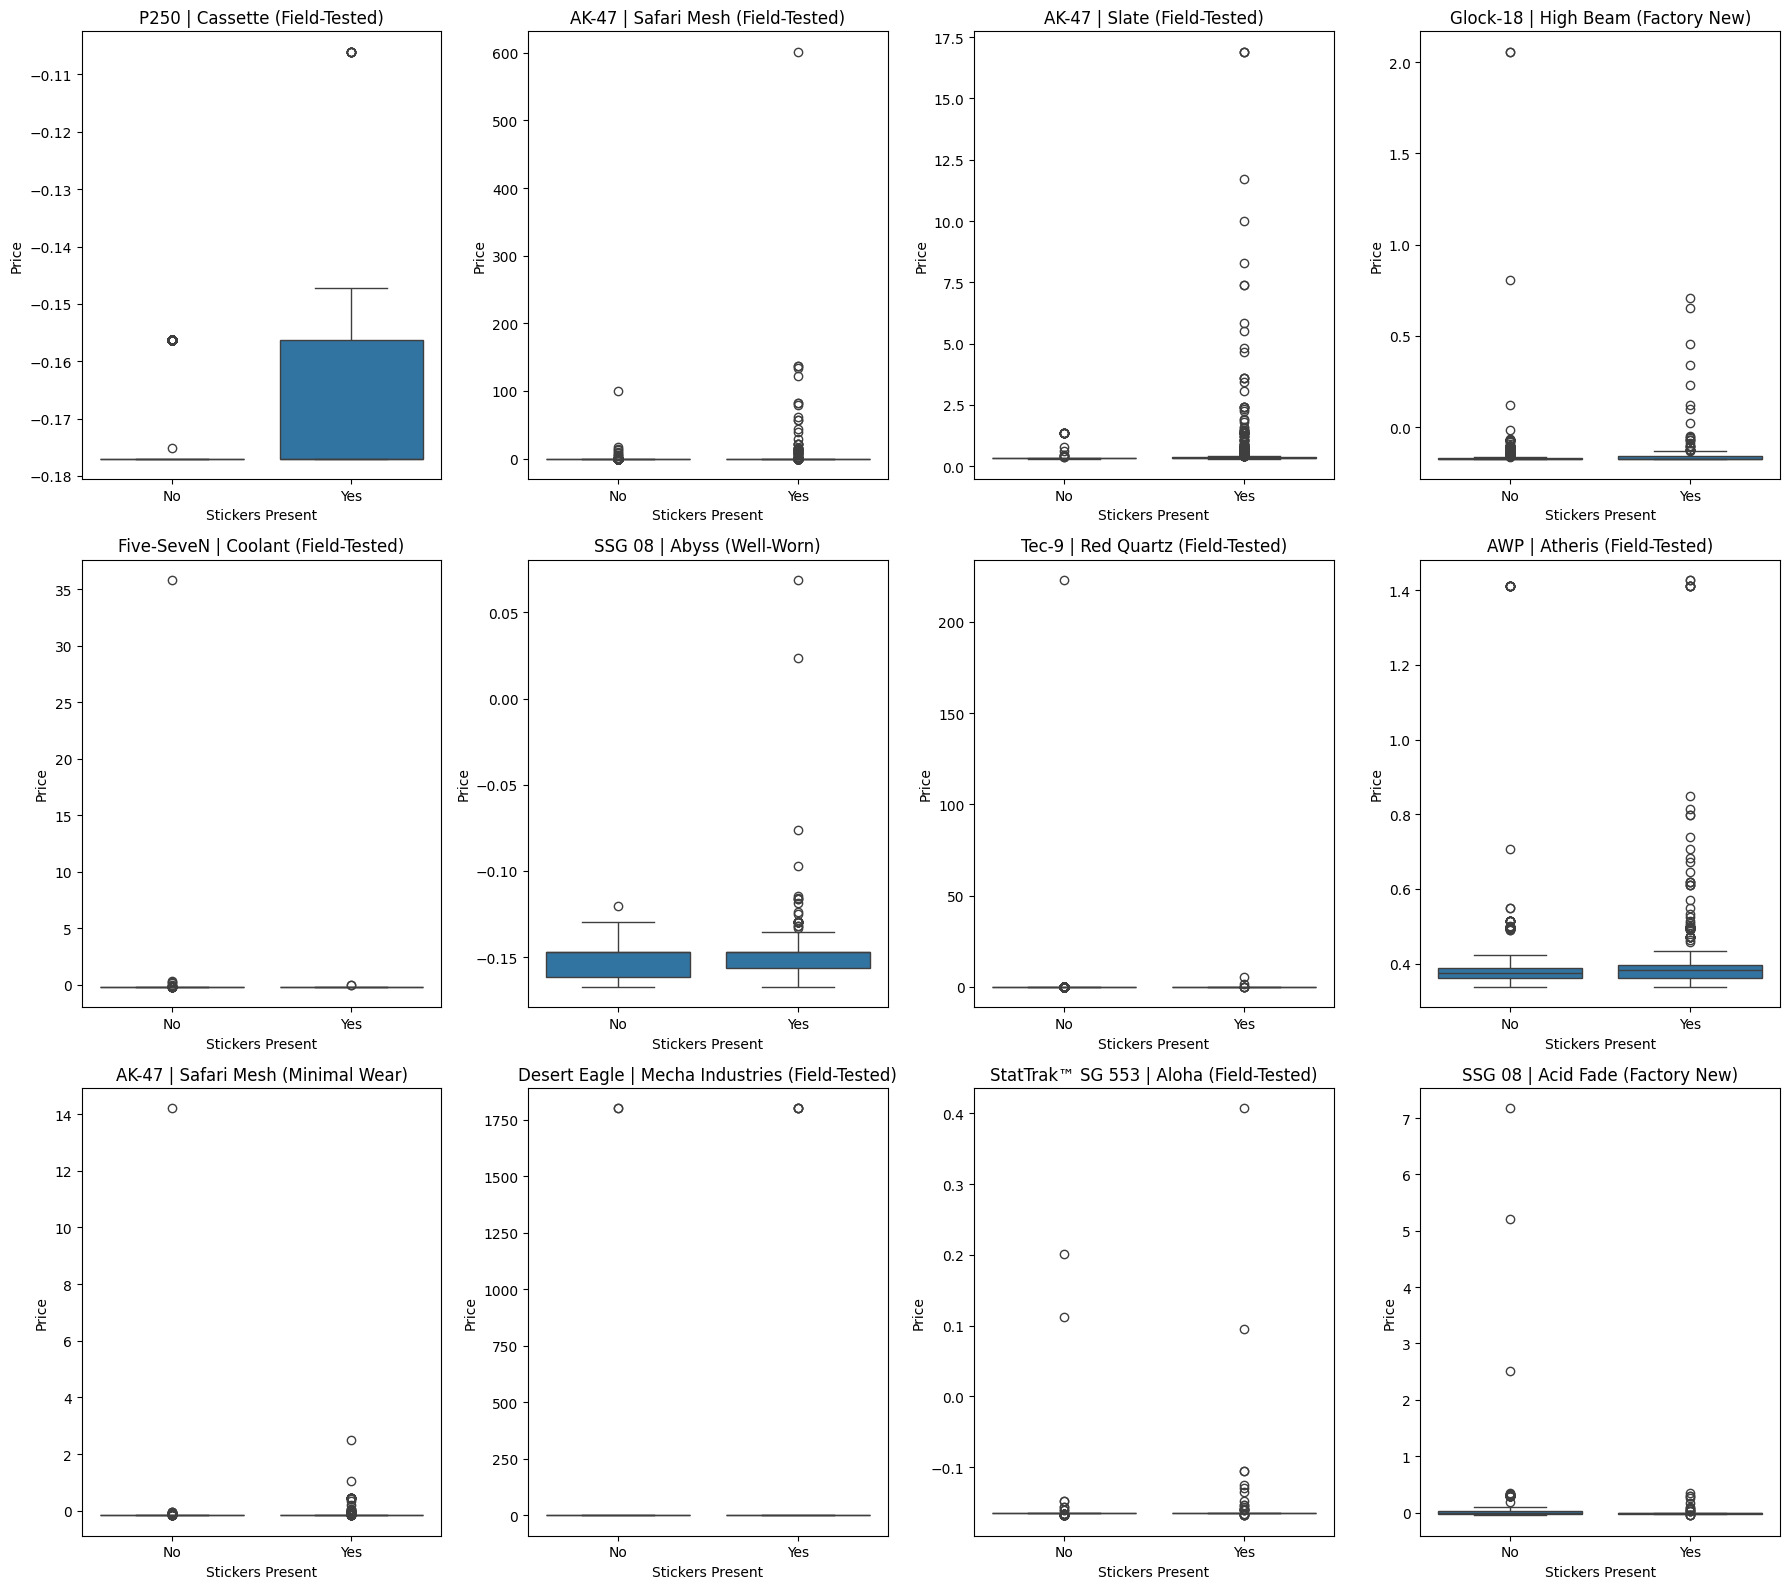

In [131]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items[df_items['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price_standardized', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

Trying to use RobustScaler to better understand graphics.

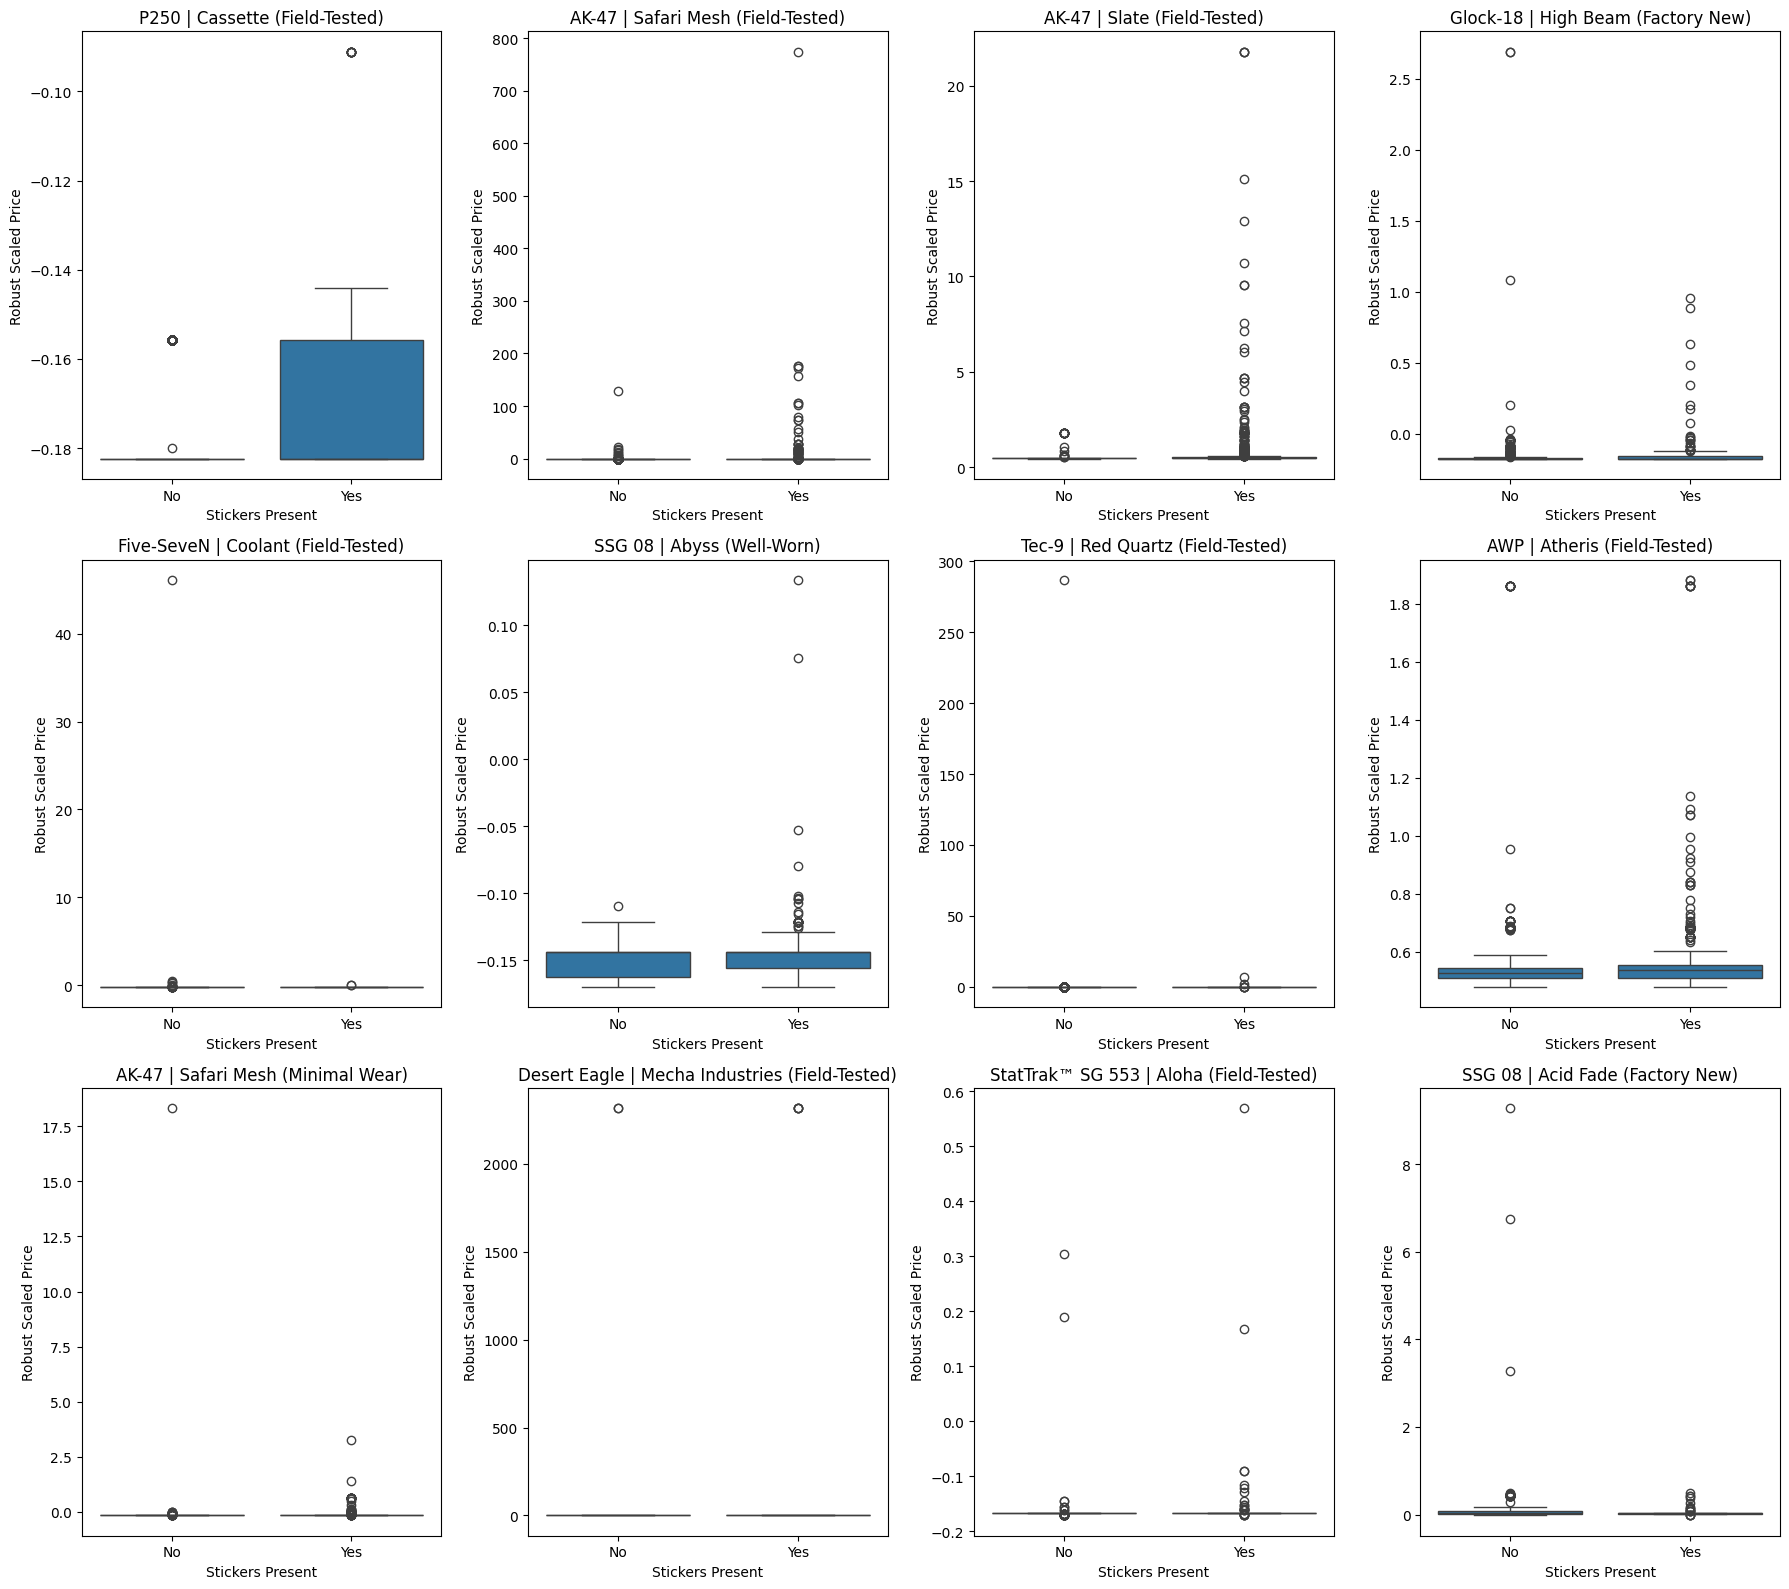

In [132]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
# Apply RobustScaler to the 'price' column and save to a different dataframe
df_items_scaled = df_items.copy()
df_items_scaled['price'] = robust_scaler.fit_transform(df_items_scaled[['price']])

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items_scaled[df_items_scaled['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Robust Scaled Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()


As we can see, there are some data anomalies present. Even using the RobustScaler didn't help to deal with outliers. We’ll now try to fix these anomalies by by removing items with an unreasonable price.

In [133]:
df_items = df_items[(df_items['stickers'].notna()) | (df_items['price'] <= df_items['avg_price'] * 20)]

df_items

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price,log_price,log_avg_price,price_standardized,sum_sticker_price
6,StatTrak™ P250 | Muertos (Minimal Wear),0.113143,NaN,1909039045|1909039045|1909039045,19.679,1013402736,NaN,NaN,Pistol,17.35,3.029119,2.909630,3.205837,0.00
11,Nova | Windblown (Battle-Scarred),0.480939,NaN,NaN,0.511,2660532544,NaN,NaN,Shotgun,0.17,0.412772,0.157004,-0.104127,0.00
12,Galil AR | Black Sand (Battle-Scarred),0.951013,NaN,2220190233|2220190233|2220190233,0.208,2505888101,NaN,NaN,Rifle,0.17,0.188966,0.157004,-0.156450,0.00
14,MAC-10 | Allure (Field-Tested),0.308989,NaN,NaN,1.025,2690764124,NaN,NaN,SMG,0.48,0.705570,0.392042,-0.015369,0.00
21,G3SG1 | Green Apple (Factory New),0.041788,NaN,154105|5133027273|5133027273|8057|5133027273,9.843,3475320686,NaN,NaN,Sniper Rifle,0.17,2.383520,0.157004,1.507339,5.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701583,XM1014 | Black Tie (Well-Worn),0.411214,157.0,18175348010|18194024765,0.358,5843604519,NaN,557.0,Shotgun,0.45,0.306013,0.371564,-0.130547,0.00
701586,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),0.148043,237.0,62186996,2.971,5843604567,NaN,289.0,Pistol,3.76,1.379018,1.560248,0.320670,0.00
701588,AWP | Neo-Noir (Minimal Wear),0.121607,893.0,NaN,27.981,5843604599,NaN,803.0,Sniper Rifle,33.50,3.366640,3.540959,4.639441,0.00
701589,M4A4 | Magnesium (Minimal Wear),0.108802,668.0,NaN,0.540,5843604623,NaN,811.0,Rifle,0.74,0.431782,0.553885,-0.099119,0.00


Let's look at graphics after data cleaning. As you can see, overall, stickers tend to increase the price of the items.

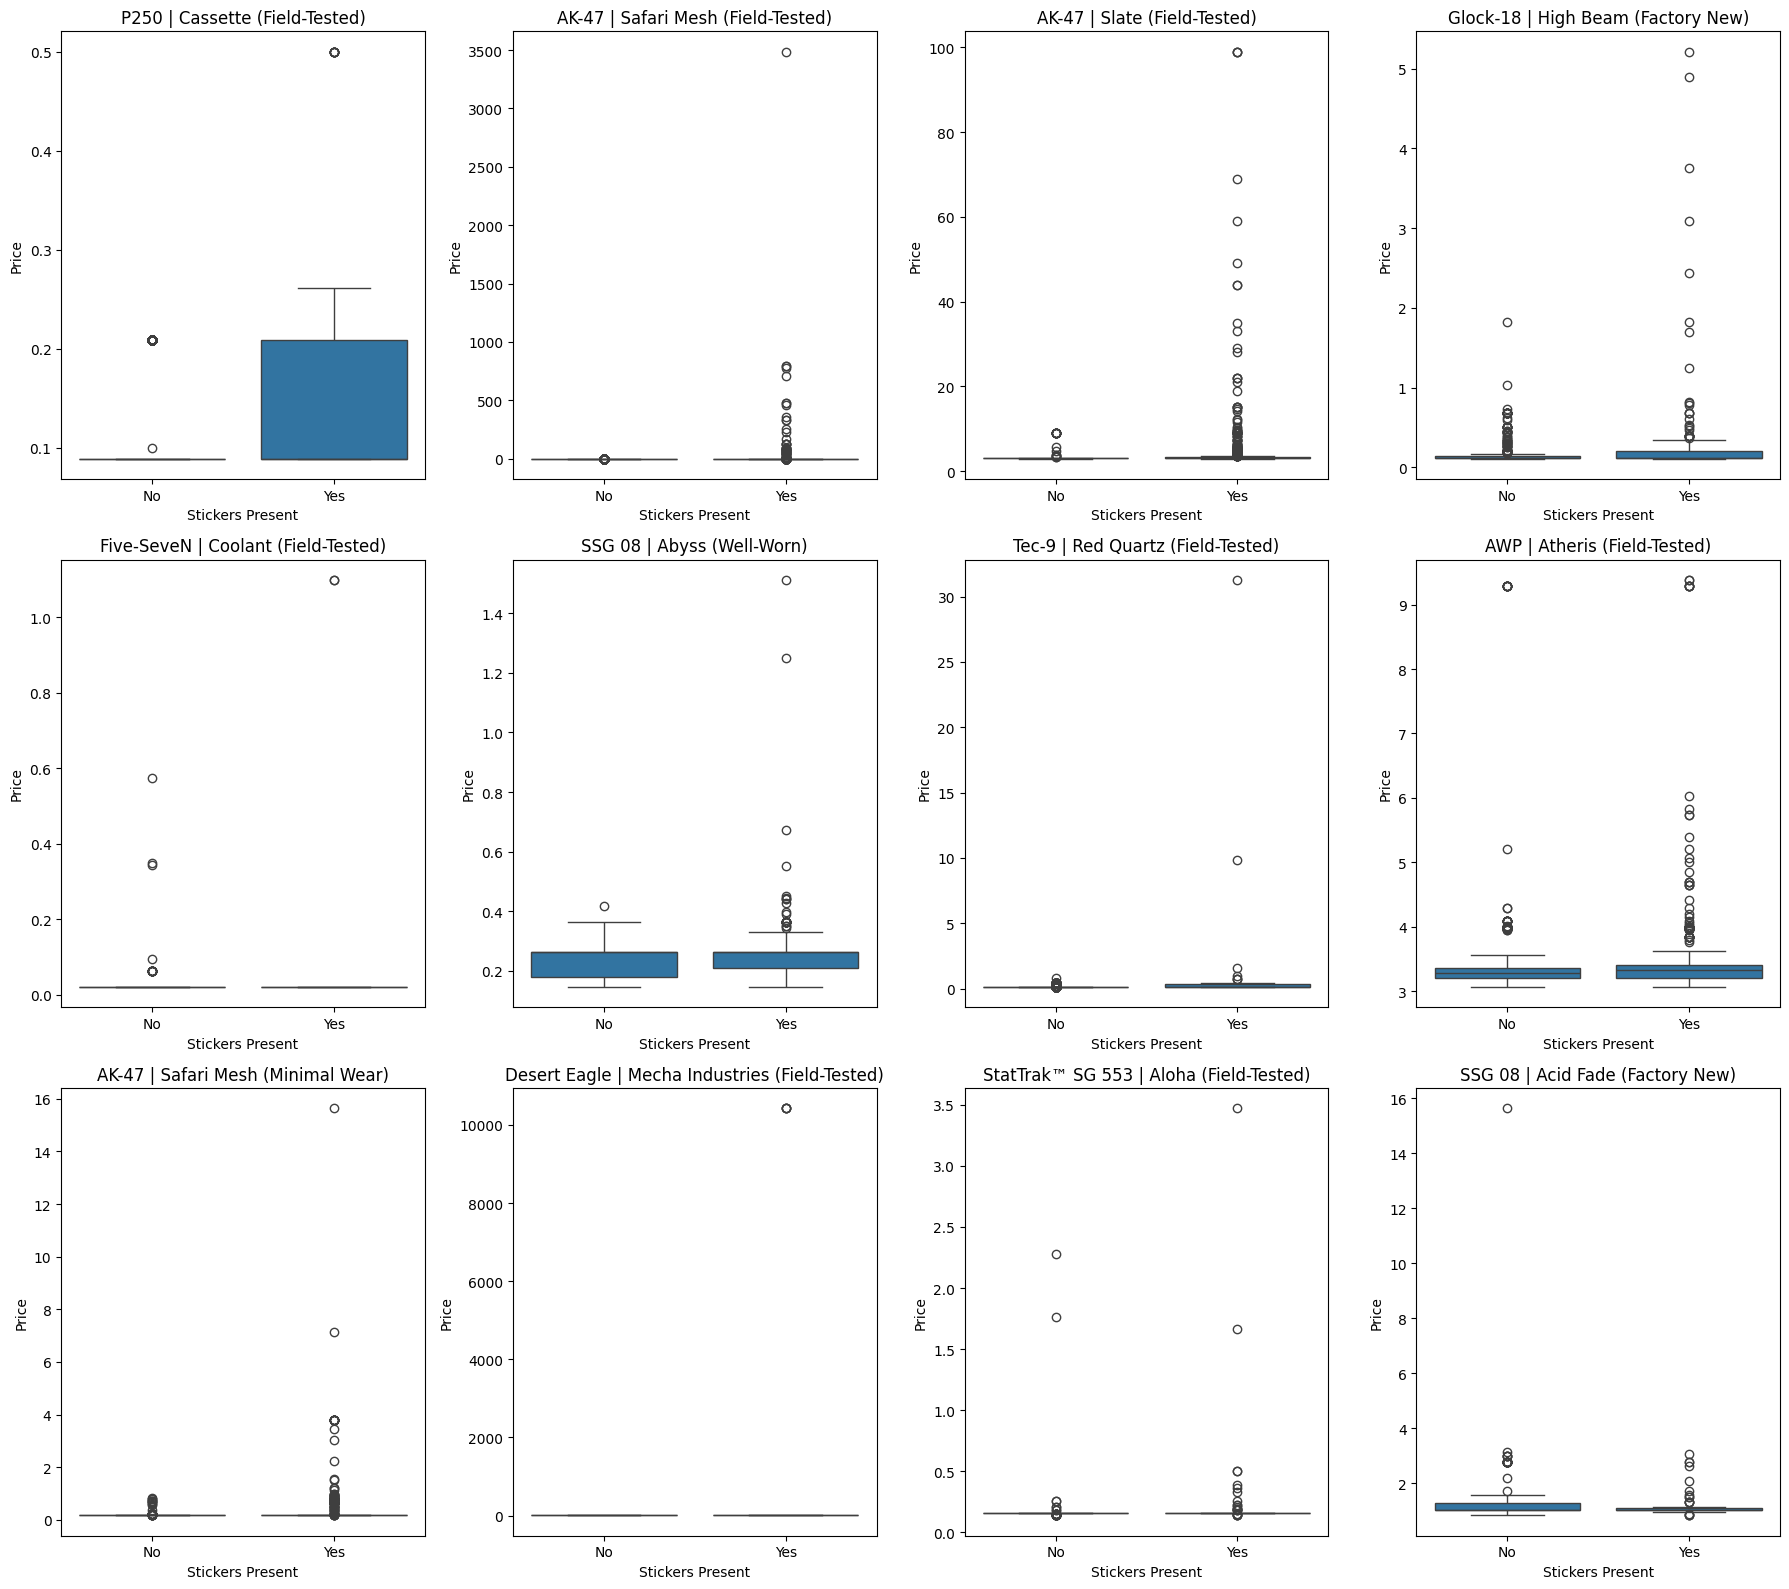

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

for i, item in enumerate(top_12_popular_names):
    item_data = df_items[df_items['market_hash_name'] == item]
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

Here is the average price for all items, comparing those with stickers to those without, including only items that are present in the dataset both with and without stickers. 

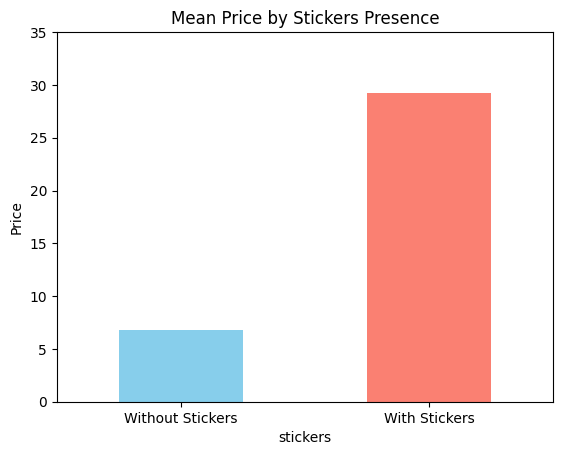

In [135]:
items_filtered_without_stickers = df_items[df_items['stickers'].isna()]['market_hash_name'].unique()
items_filtered_with_stickers = df_items[df_items['stickers'].notna()]['market_hash_name'].unique()

df_filtered = df_items[df_items['market_hash_name'].isin(items_filtered_without_stickers) & df_items['market_hash_name'].isin(items_filtered_with_stickers)]

avg_price_by_sticker = df_filtered.groupby(df_filtered['stickers'].notna())['price'].mean()

avg_price_by_sticker.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Without Stickers', 'With Stickers'], rotation=0)
plt.ylabel('Price')
plt.title('Mean Price by Stickers Presence')
plt.ylim(0,35) 
plt.show()

///

There are twice as few items with stickers on sale

In [136]:
items_with_stickers = df_items['stickers'].notna().sum()
items_without_stickers = df_items['stickers'].isna().sum()

print(f"Items with stickers: {items_with_stickers}")
print(f"Items without stickers: {items_without_stickers}")

Items with stickers: 101732
Items without stickers: 202597


Let's take a closer look at a particular item called `AK-47 | Slate (Field-Tested)`. It is one of the most popular items in the dataset and is one of the most popular items for placing stickers. We can further examine the effect of sticker price on the item on this item.

In [137]:
item_to_selecet = "AK-47 | Slate (Field-Tested)"
ak47_slate = df_items[df_items['market_hash_name'] == item_to_selecet]
ak47_slate_with_stickers = ak47_slate[ak47_slate['stickers'].notna()].shape[0]
ak47_slate_without_stickers = ak47_slate[ak47_slate['stickers'].isna()].shape[0]
print(f'{item_to_selecet} with stickers: {ak47_slate_with_stickers}\n{item_to_selecet} without stickers: {ak47_slate_without_stickers}')

AK-47 | Slate (Field-Tested) with stickers: 1106
AK-47 | Slate (Field-Tested) without stickers: 197


There are more items with stickers and they're more expensive.

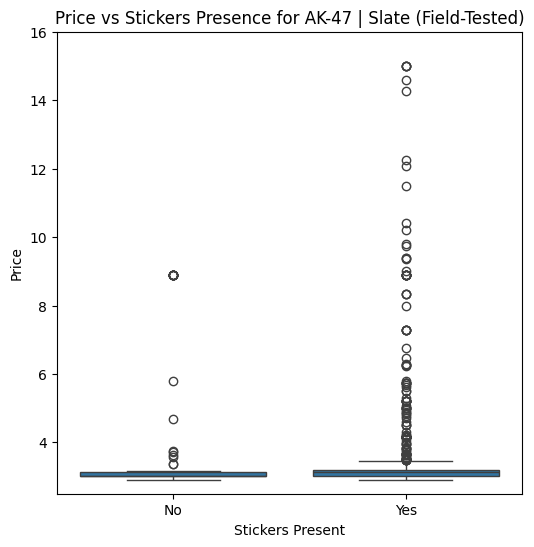

In [138]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=ak47_slate['stickers'].notna(), y='price', data=ak47_slate)
plt.title('Price vs Stickers Presence for AK-47 | Slate (Field-Tested)')
plt.xlabel('Stickers Present')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(2.5, 16)
plt.show()

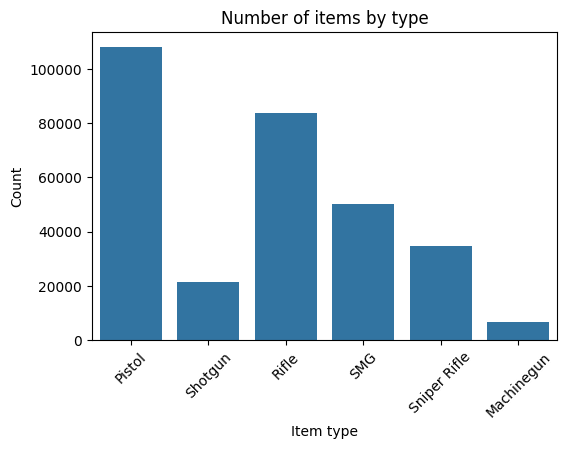

In [139]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df_items)
plt.title('Number of items by type')
plt.xlabel('Item type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

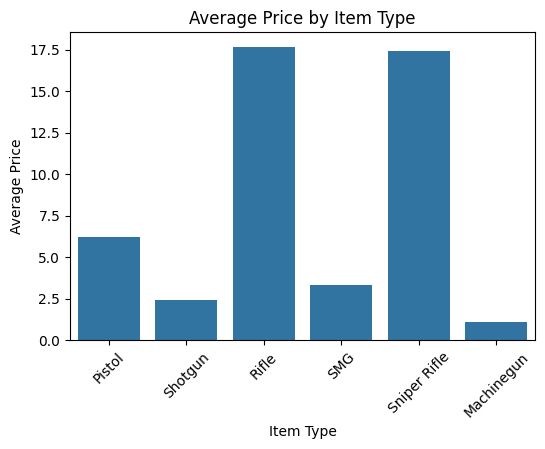

In [140]:
plt.figure(figsize=(6, 4))
sns.barplot(x='type', y='avg_price', data=df_items, errorbar=None)
plt.title('Average Price by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

### bs

In [141]:
df_items_sorted = df_items.sort_values(by='sum_sticker_price', ascending=False)
df_drop_empty_avg_sticker_price = df_items_sorted[df_items_sorted['sum_sticker_price'] != 0]
df_drop_empty_avg_sticker_price.head(30)

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price,log_price,log_avg_price,price_standardized,sum_sticker_price
143289,StatTrak™ USP-S | Serum (Minimal Wear),0.112255,330.0,2023167|1425334777,2376.463,5549178052,NaN,221.0,Pistol,48.53,7.773789,3.902579,410.179416,70330.22
476060,AWP | Redline (Minimal Wear),0.127339,554.0,2023167|586276|2023167|2023167,42113.455,5827101950,NaN,259.0,Sniper Rifle,97.32,10.648146,4.588227,7272.032637,69400.00
143288,Desert Eagle | Cobalt Disruption (Factory New),0.034576,150.0,1382152,1844.886,5549177961,NaN,231.0,Pistol,102.46,7.520715,4.639185,318.385771,69000.00
59752,AK-47 | Case Hardened (Field-Tested),0.351743,487.0,1382152,2055.000,5298091727,NaN,44.0,Rifle,306.91,7.628518,5.729808,354.668624,69000.00
15872,M4A1-S | Bright Water (Minimal Wear),0.116098,366.0,554817|4298818|1230564|601566,1097.167,4200193930,NaN,189.0,Rifle,33.72,7.001398,3.547316,189.268347,4783.33
59753,AK-47 | Blue Laminate (Minimal Wear),0.085615,40.0,1230564|554817|450475|556556,835.000,5298091776,NaN,226.0,Rifle,14.65,6.728629,2.750471,143.996892,4753.04
12526,AUG | Contractor (Battle-Scarred),0.528743,956.0,1412941|2015210|1028427|450476,573.270,4069592629,NaN,46.0,Rifle,0.03,6.353100,0.029559,98.800898,4683.29
139091,StatTrak™ USP-S | Orion (Minimal Wear),0.145007,344.0,39250|2674697|620912|1412941,2084.617,5521036799,NaN,313.0,Pistol,107.84,7.642820,4.689879,359.782939,4340.07
44861,P250 | Splash (Minimal Wear),0.109596,775.0,1230564|1326569|556556,300.000,5274718440,NaN,162.0,Pistol,23.29,5.707110,3.190065,51.612157,3933.53
556570,AWP | Graphite (Factory New),0.010839,632.0,554817|245|1028428|610132,650.000,5837226374,NaN,212.0,Sniper Rifle,182.16,6.478510,5.210360,112.050768,3733.39


In [142]:
df_items['overpay'] = df_items['price'] / df_items['avg_price']


In [143]:
columns_to_remove = ['paintseed', 'paintindex', 'phase'] 
df_items.drop(columns=columns_to_remove, inplace=True)


In [144]:

df_items_sorted_by_sticker_price = df_items.sort_values(by='sum_sticker_price', ascending=False)
df_drop_empty_avg_sticker_price = df_items_sorted_by_sticker_price[
    (df_items_sorted_by_sticker_price['overpay'] < 10) & 
    (df_items_sorted_by_sticker_price['price'] < 1000) &
    (~df_items_sorted_by_sticker_price['market_hash_name'].str.contains('Souvenir')) &
    (df_items_sorted_by_sticker_price['sum_sticker_price'] > 10) &
    (df_items_sorted_by_sticker_price['type'].isin(['Rifle', 'Sniper Rifle']))
    ]

df_drop_empty_avg_sticker_price


,market_hash_name,float,stickers,price,id,type,avg_price,log_price,log_avg_price,price_standardized,sum_sticker_price,overpay
556570,AWP | Graphite (Factory New),0.010839,554817|245|1028428|610132,650.000,5837226374,Sniper Rifle,182.16,6.478510,5.210360,112.050768,3733.39,3.568292
131948,AWP | Graphite (Factory New),0.051929,1306535|1230564,535.000,5501010387,Sniper Rifle,182.16,6.284134,5.210360,92.192367,2488.42,2.936978
339165,AWP | Electric Hive (Factory New),0.069317,556556|405892|1028428|12770479213|15639944330,449.990,5786402219,Sniper Rifle,66.89,6.111445,4.217889,77.512692,2371.74,6.727313
217416,AK-47 | Red Laminate (Battle-Scarred),0.614672,77948|7365|586274|1230564,145.913,5701517306,Rifle,51.36,4.989841,3.958143,25.004144,2322.74,2.840985
238891,AK-47 | Case Hardened (Well-Worn),0.425048,1230564|556556|385037249|1823169733,406.501,5731964042,Rifle,233.94,6.010043,5.459330,70.002936,2293.76,1.737629
...,...,...,...,...,...,...,...,...,...,...,...,...
588196,AK-47 | Safari Mesh (Minimal Wear),0.142862,1333830967|1325894488|1343653747|1335625292,0.759,5839990366,Rifle,0.21,0.564745,0.190620,-0.061302,10.04,3.614286
77645,AK-47 | Nightwish (Battle-Scarred),0.935806,37838|37838|37838|37838,20.847,5356511648,Rifle,6.50,3.084064,2.014903,3.407529,10.03,3.207231
616740,StatTrak™ FAMAS | Pulse (Field-Tested),0.281353,37838,11.439,5841493503,Rifle,12.32,2.520837,2.589267,1.782939,10.03,0.928490
519105,M4A4 | Tornado (Battle-Scarred),0.699723,37838,4.463,5833277102,Rifle,4.53,1.697998,1.710188,0.578311,10.03,0.985210


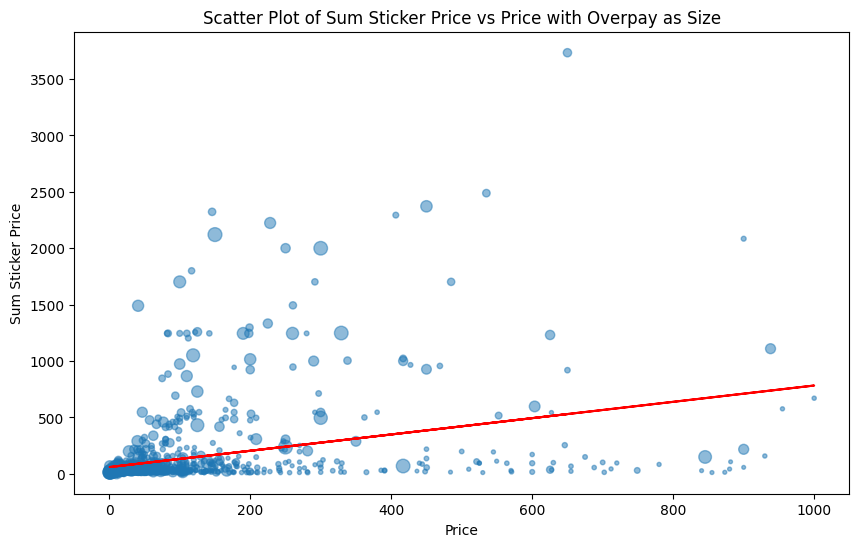

In [145]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(df_drop_empty_avg_sticker_price['price'], 
            df_drop_empty_avg_sticker_price['sum_sticker_price'], 
            s=df_drop_empty_avg_sticker_price['overpay']*10, 
            alpha=0.5)

x = df_drop_empty_avg_sticker_price['price']
y = df_drop_empty_avg_sticker_price['sum_sticker_price']
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, color='red')
plt.xlabel('Price')
plt.ylabel('Sum Sticker Price')
plt.title('Scatter Plot of Sum Sticker Price vs Price with Overpay as Size')
plt.show()


In [146]:
df_float = df_items_sorted_by_sticker_price[
    (df_items_sorted_by_sticker_price['overpay'] < 10) & 
    (df_items_sorted_by_sticker_price['price'] < 1000) 
    ]



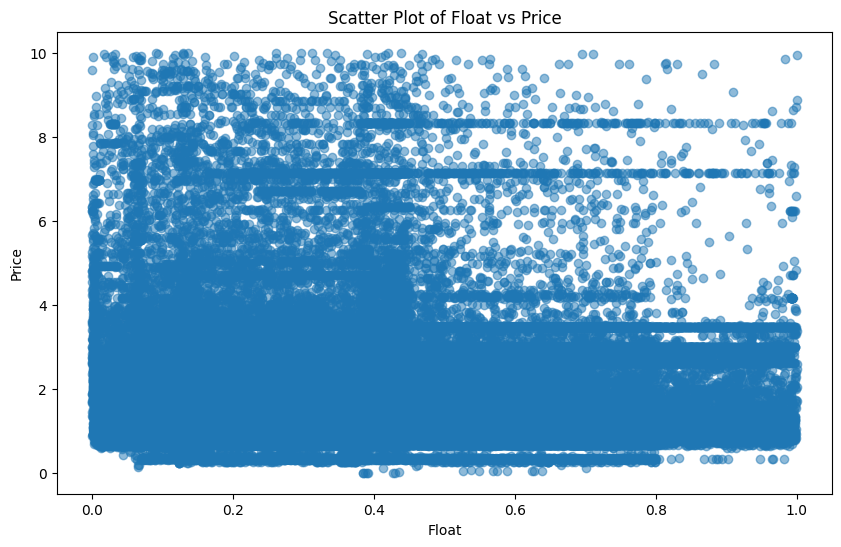

In [147]:



plt.figure(figsize=(10, 6))
plt.scatter(df_float['float'], df_float['overpay'], alpha=0.5)
plt.xlabel('Float')
plt.ylabel('Price')
plt.title('Scatter Plot of Float vs Price')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6408\933068362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_float['float_bin'] = pd.cut(df_float['float'], bins)
C:\Users\user\AppData\Local\Temp\ipykernel_6408\933068362.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_overpay_by_float_bin = df_float.groupby('float_bin')['overpay'].mean()


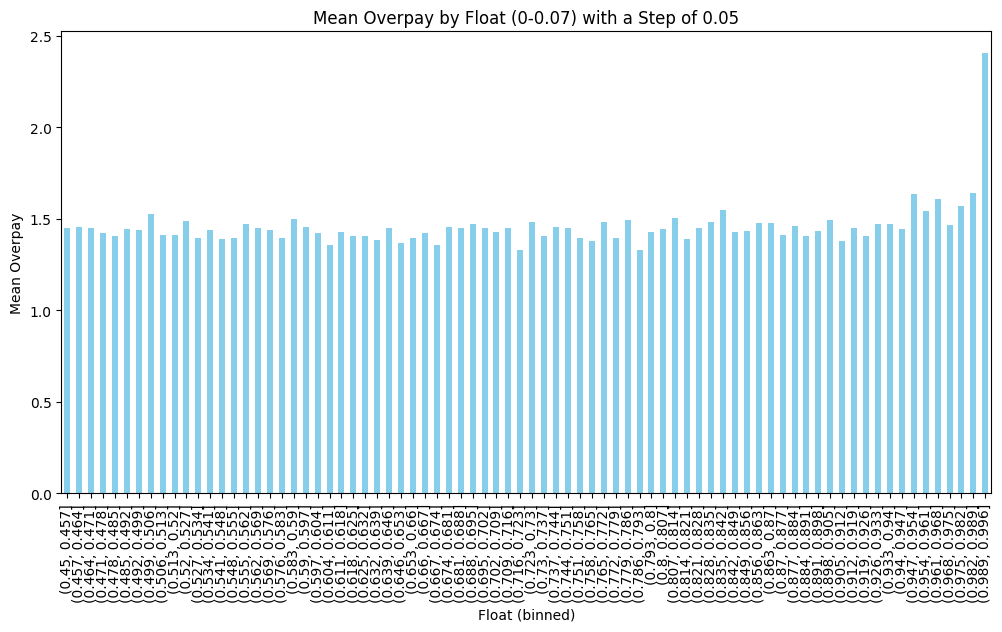

In [148]:
# Create bins for the float values
bins = np.arange(0.45, 1, 0.007)
df_float['float_bin'] = pd.cut(df_float['float'], bins)

# Calculate the mean overpay for each bin
mean_overpay_by_float_bin = df_float.groupby('float_bin')['overpay'].mean()

# Plot the bar graph
plt.figure(figsize=(12, 6))
mean_overpay_by_float_bin.plot(kind='bar', color='skyblue')
plt.xlabel('Float (binned)')
plt.ylabel('Mean Overpay')
plt.title('Mean Overpay by Float (0-0.07) with a Step of 0.05')
plt.show()